**Data on Economic and Financial crises in 13 African Countries (1860 to 2014)**<br/>
- Pandas will be used to analyze this data in the quest of understanding the dynamics of financial stability in the African context.

In [71]:
#import pandas library & introduce the data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
African_crisis = pd.read_csv("african_crises.csv")
African_crisis.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crisis,inflation_crisis,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [72]:
#check for duplicates & drop duplicates
African_crisis_duplicate = African_crisis.duplicated()
African_crisis_duplicate.sum()

0

In [73]:
#remove unneccessary columns
African_crisis_cleaned = African_crisis.drop(columns=["case","cc3","exch_usd"])
African_crisis_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 11 columns):
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crisis                    1059 non-null int64
inflation_crisis                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(2), int64(7), object(2)
memory usage: 91.1+ KB


**African Countries Independence between 1860 and 2014** <br/>
- South Africa is the first country to gain independence in 1910
- Angola is the last to gain independence in 1975 after colonization

In [80]:
African_Independence = African_crisis_cleaned.groupby(['year']).apply(lambda x: x.loc[x['independence'] ==1]).groupby('country').first()
African_Independence= African_Independence.rename_axis('country').reset_index()
print(African_Independence[["country","year"]])


                     country  year
0                    Algeria  1968
1                     Angola  1975
2   Central African Republic  1960
3                      Egypt  1860
4                Ivory Coast  1960
5                      Kenya  1963
6                  Mauritius  1963
7                    Morocco  1956
8                    Nigeria  1960
9               South Africa  1910
10                   Tunisia  1956
11                    Zambia  1964
12                  Zimbabwe  1965


**Systemic crisis by country from the year 1860 - 2014** <br/>
- Angola, Mauritus and South Africa never experienced a systemic crisis <br/>
- Central African Republic,Kenya,Nigeria and Zimbabwe have the highest years of crisis at 19,13,10 & 15 respectively <br/>
- Egypt had no crisis for 149 years <br/>


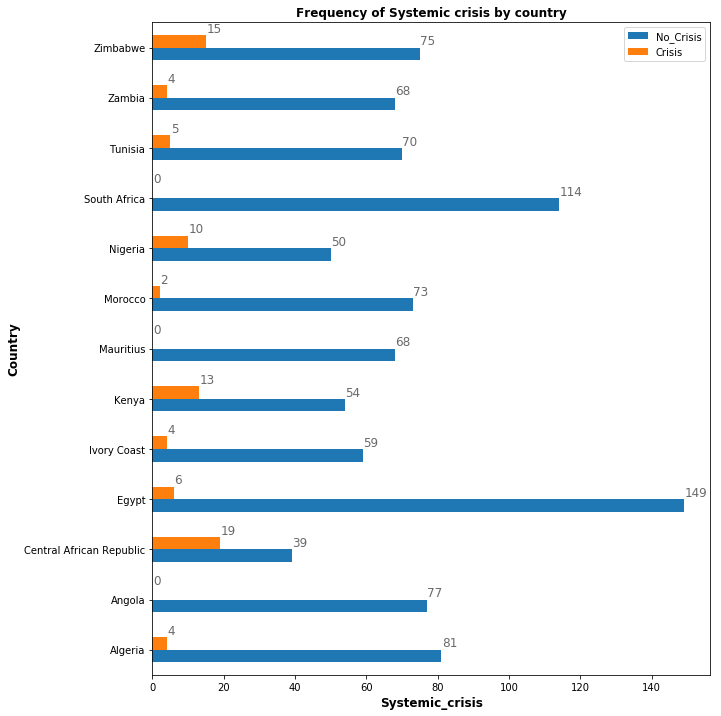

In [75]:
African_systemic = African_crisis_cleaned.groupby(['country','systemic_crisis']).size().unstack(fill_value=0).plot(kind='barh', figsize=(10,12))
groups.set_xlabel("Systemic_crisis", weight = "bold", size = 12)
groups.set_ylabel("Country", weight = "bold", size = 12)
groups.legend(["No_Crisis","Crisis"])
plt.title("Frequency of Systemic crisis by country", weight = 'bold')
for i in groups.patches:
    groups.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=12, color='dimgrey')
 

**Inflation crisis by country(1860-2014)**<br/>
- South Africa, Kenya, Ivory Coast and Central African Republic have the lowest years of crisis at 1,4,4 & 2 respectively
- Zimbabwe, Zambia, and Angola were in crisis for a longer period of time at 19,20 & 26 years respectively

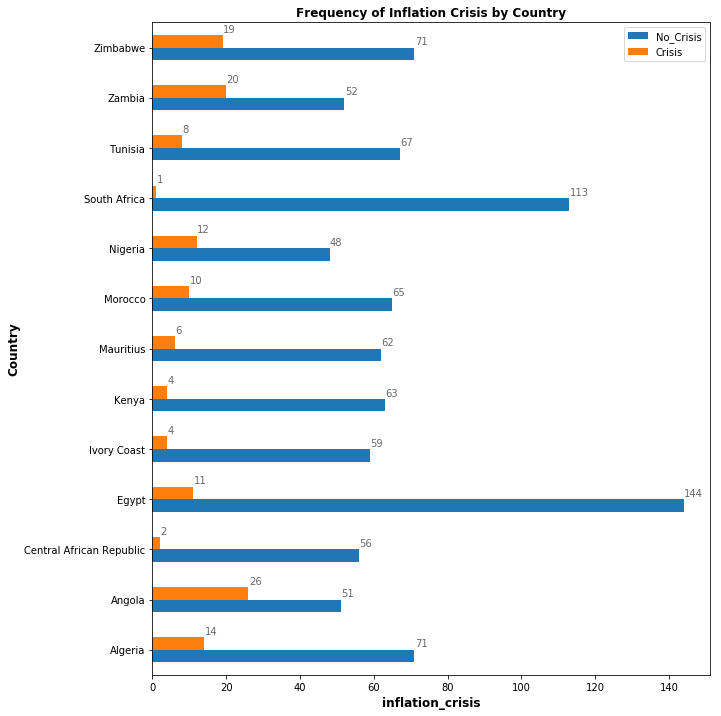

In [76]:
#groups = African_crisis_cleaned
groups = African_crisis_cleaned.groupby(['country','inflation_crisis']).size().unstack(fill_value=0).plot(kind='barh',figsize=(10,12))
groups.set_xlabel("inflation_crisis", weight = "bold", size = 12)
groups.set_ylabel("Country", weight = "bold", size = 12)
groups.legend(["No_Crisis","Crisis"])
plt.title("Frequency of Inflation Crisis by Country", weight = "bold")
for i in groups.patches:
     groups.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')
      

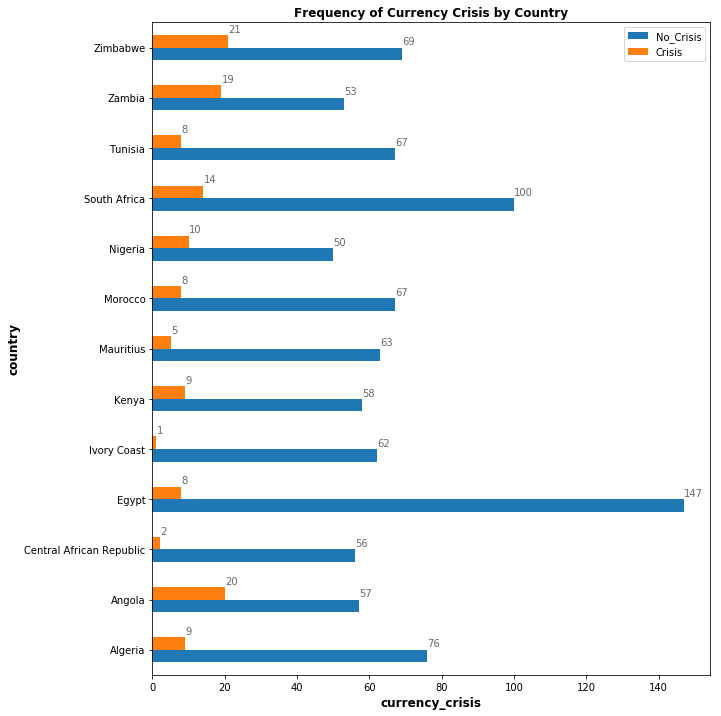

In [77]:
groups = African_crisis_cleaned.groupby(['country','currency_crisis']).size().unstack(fill_value=0).plot(kind='barh',figsize=(10,12))
groups.set_xlabel("currency_crisis", weight = "bold", size = 12)
groups.set_ylabel("country", weight = "bold", size = 12)
groups.legend(["No_Crisis","Crisis"])
plt.title("Frequency of Currency Crisis by Country", weight = "bold")
for i in groups.patches:
     groups.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')           

**Banking Crisis by Country(1860-2014)**<br/>
- Zimbabwe,Nigeria,Egypt and Central African Republic have the longest period of banking crisis
- Morocco & Mauritius were in crisis for only 1 and 2 years respectively

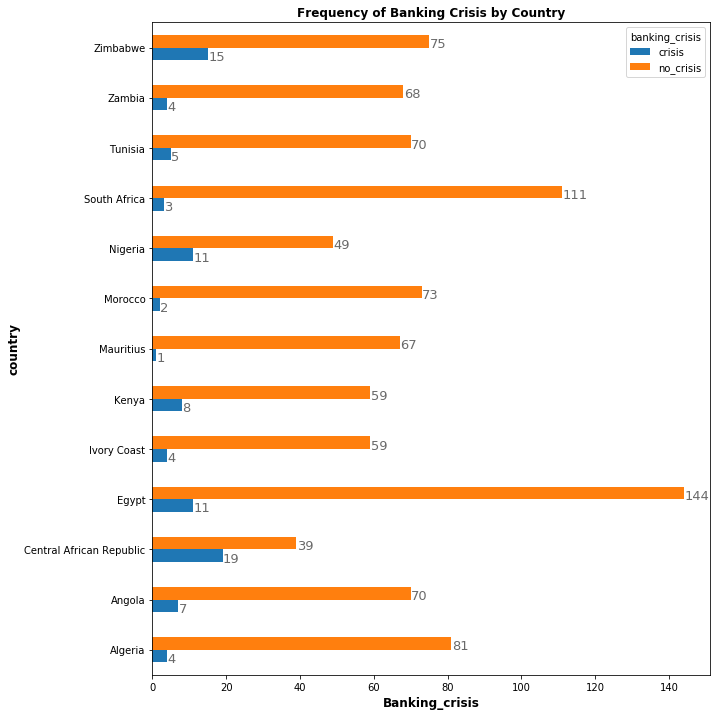

In [90]:
df = African_crisis_cleaned.groupby(['country','banking_crisis']).size().unstack(fill_value=0).plot(kind='barh',figsize=(10,12))
plt.title("Frequency of Banking Crisis by Country", weight="bold")
df.set_xlabel("Banking_crisis", weight="bold", size=12)
df.set_ylabel("country", weight="bold", size=12)

for i in df.patches:
     df.text(i.get_width()+.1, i.get_y()+.0, \
            str(round((i.get_width()), 2)), fontsize=13, color='dimgrey')   


**Sovereign external debt default by Country (1860-2014)**<br/>
- Zimbabwe,Ivory Coast & Central African Republic are the most inclined to default considering the fact they defaulted for 30, 29 & 33 years respectively.
- Mauritius seems to be the most reliable country to give loan because they never defaulted.

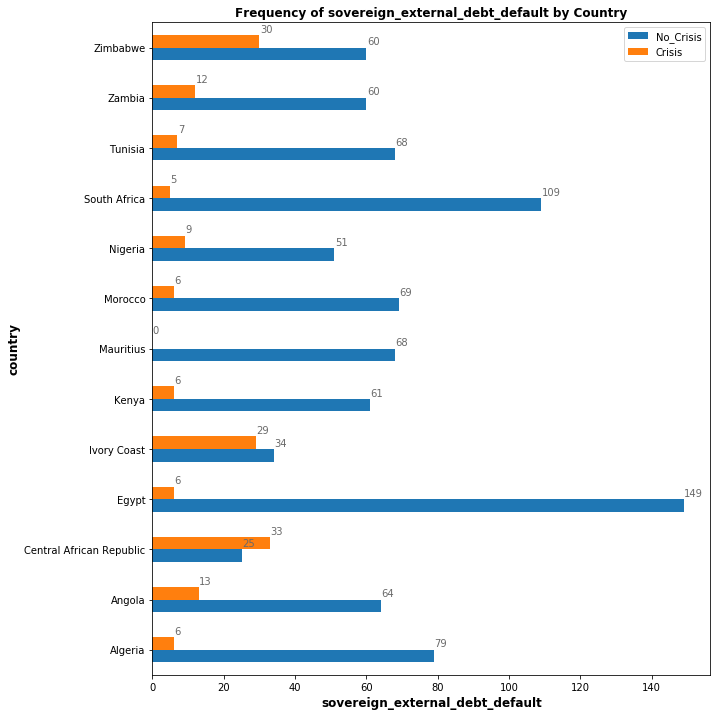

In [79]:
groups = African_crisis_cleaned.groupby(['country','sovereign_external_debt_default']).size().unstack(fill_value=0).plot(kind='barh',figsize=(10,12))
groups.set_xlabel("sovereign_external_debt_default", weight = "bold", size = 12)
groups.set_ylabel("country", weight = "bold", size = 12)
groups.legend(["No_Crisis","Crisis"])

plt.title("Frequency of sovereign_external_debt_default by Country", weight = "bold")
for i in groups.patches:
     groups.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

**Findings**<br/>
- It appears banking crisis is the factor that is most associated with systemic crisis in Africa
- Mauritius never experienced systemic crisis between the years 1860 and 2014 and overall it seems to be the most financially stable country. 
